In [1]:
import pandas as pd
import numpy as np

import sqlite3

from matplotlib import pyplot as plt
import seaborn as sns

import locale

locale.setlocale(locale.LC_ALL, "tr_TR")
pd.options.display.max_columns = None
sns.set_style("whitegrid")

In [2]:
conn = sqlite3.connect("/Users/berkayg/Codes/sahibinden-project/data/sahibinden_db_v2.db")
df = pd.read_sql("SELECT * FROM car_table", conn)

df.insert(loc=4, column="date", value=pd.to_datetime(df.datestring, format="%d %B %Y"))
df.sort_values(by=["date"], inplace=True)
df["fiyat"] = df["fiyat"].astype(int)
df["yil"] = df["yil"].astype(int)
df["km"] = df["km"].astype(int)
df = df.loc[(df["date"] >= "2021-10-01") & (df["yil"] >= 2010)].reset_index(drop=True)

print(df.shape)
df.head()

(25696, 150)


,adid,title,description,datestring,date,cat1,cat2,cat3,cat4,cat5,cat6,cat0,loc1,loc2,loc3,loc4,loc5,yil,yakit,vites,km,kasatipi,motorgucu,motorhacmi,cekis,renk,garanti,kimden,fiyat,url,checked,frontbumper,fronthood,roof,frontrightmudguard,frontrightdoor,rearrightdoor,rearrightmudguard,frontleftmudguard,frontleftdoor,rearleftdoor,rearleftmudguard,rearhood,rearbumper,slacklabel,ABC,ABS,AEB,EBP,ASR,ESPVSA,Airmatic,EDL,EBA,EBD,TCS,BAS,Distronic,YokuşKalkışDesteği,ZırhlıAraç,GeceGörüş,ŞerittenAyrılmaİkazı,ŞeritDeğiştirmeYardımcısı,HavaYastığıSürücü,HavaYastığıYolcu,HavaYastığıYan,HavaYastığıDiz,HavaYastığıPerde,HavaYastığıTavan,KörNoktaUyarıSistemi,LastikArızaGöstergesi,YorgunlukTespitSistemi,Isofix,Alarm,ÇocukKilidi,MerkeziKilit,Immobilizer,DeriKoltuk,KumaşKoltuk,DeriKumaşKoltuk,ElektrikliÖnCamlar,ElektrikliArkaCamlar,KlimaAnalog,KlimaDijital,OtmKararanDikizAynası,ÖnKolDayama,ArkaKolDayama,AnahtarsızGirişveÇalıştırma,num6İleriVites,num7İleriVites,HidrolikDireksiyon,FonksiyonelDireksiyon,AyarlanabilirDireksiyon,DeriDireksiyon,AhşapDireksiyon,IsıtmalıDireksiyon,KoltuklarElektrikli,KoltuklarHafızalı,KoltuklarKatlanır,KoltuklarÖnIsıtmalı,KoltuklarArkaIsıtmalı,KoltuklarSoğutmalı,HızSabitleyici,AdaptiveCruiseControl,SoğutmalıTorpido,YolBilgisayarı,KromKaplama,AhşapKaplama,HeadupDisplay,StartStop,GeriGörüşKamerası,ÖnGörüşKamerası,num3SıraKoltuk,Hardtop,FarLED,FarHalojen,FarXenon,FarBiXenon,FarSis,FarAdaptif,FarGeceSensörü,FarYıkama,AynalarElektrikli,AynalarOtomKatlanır,AynalarIsıtmalı,AynalarHafızalı,ParkSensörüArka,ParkSensörüÖn,ParkAsistanı,AlaşımlıJant,Sunroof,PanoramikCamTavan,YağmurSensörü,ArkaCamBuzÇözücü,PanoramikÖnCam,RomörkÇekiDemiri,AkıllıBagajKapağı,RadyoKasetçalar,RadyoCDÇalar,RadyoMP3Çalar,Navigasyon,TV,BluetoothTelefon,USBAUX,AUX,iPodBağlantısı,num6Hoparlör,CDDeğiştirici,ArkaEğlencePaketi,DVDDeğiştirici
0,951495082,AE MOTORS TR'DE TEK HATASIZ&BOYASIZ+TRAMERSİZ+...,2014 MODEL BMW 118İ 4 SİLİNDİR 170 HP\nORJİNAL...,01 Ekim 2021,2021-10-01,vasita,otomobil,bmw,1-serisi,118i,m-plus,vasita-otomobil-bmw-1-serisi-118i-m-plus,turkiye,istanbul,esenyurt,esenyurt,gokevler-mh.,2014,benzin,otomatik,100000,hatchback-5-kapi,170,1598,arkadan-itis,mavi,hayir,galeriden,289500,https://www.sahibinden.com/ilan/vasita-otomobi...,None,original,original,original,original,original,original,original,original,original,original,original,original,original,None,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,1,1,1,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,1,1,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,1,0,1,0,0,1,1,0,0,0,0,0
1,945820122,"""TÜRKİYEDE İLK VE TEK İÇ DIŞ YENİ KASA C200 AM...",İLETİŞİM\n0530 926 17 64\n0532 362 70 32\nMERC...,02 Ekim 2021,2021-10-02,vasita,otomobil,mercedes-benz,c-serisi,c-200,amg,vasita-otomobil-mercedes-benz-c-serisi-c-200-amg,turkiye,istanbul,kadikoy,merdivenkoy,merdivenkoy-mh.,2021,benzin,otomatik,0,sedan,201_225,1301_1600,arkadan-itis,siyah,evet,galeriden,999000,https://www.sahibinden.com/ilan/vasita-otomobi...,None,original,original,original,original,original,original,original,original,original,original,original,original,original,None,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,945858258,YENİ KASA TR DE İLK VE TEK MERCEDES C200 AMG A...,İLETİŞİM\n0530 926 17 64\n0532 362 70 32\nMERC...,02 Ekim 2021,2021-10-02,vasita,otomobil,mercedes-benz,c-serisi,c-200,amg,vasita-otomobil-mercedes-benz-c-serisi-c-200-amg,turkiye,istanbul,kadikoy,merdivenkoy,merdivenkoy-mh.,2021,benzin,otomatik,0,sedan,201_225,1301_1600,arkadan-itis,beyaz,evet,galeriden,999000,https://www.sahibinden.com/ilan/vasita-otomobi...,None,original,original,original,original,original,original,original,original,original,original,original,original,original,None,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [3]:
cat3_order = df.groupby("cat3").fiyat.median().sort_values(ascending=False).index.tolist()

In [4]:
df_cat3_by_year = df.query("fiyat < 2000000").groupby(["yil", "cat3"]).median()["fiyat"].loc[pd.IndexSlice[df.yil.sort_values().unique(), cat3_order]].reset_index()
df_cat3_by_year_base = df.groupby("yil").agg({"cat3": lambda x: cat3_order}).reset_index().explode("cat3").reset_index(drop=True)
# df_cat3_by_year_base.merge(df_cat3_by_year, how="left", on=["yil", "cat3"])
df_cat3_by_year_base.set_index(["yil", "cat3"], inplace=True)
df_cat3_by_year.set_index(["yil", "cat3"], inplace=True)
df_cat3_by_year_base["fiyat"] = df_cat3_by_year["fiyat"]
df_cat3_by_year_base.reset_index(inplace=True)
df_cat3_by_year_base#.loc[df_cat3_by_year_base["yil"] > 2014]

/var/folders/sr/r72219hj06x_1xvw7hhd517h0000gn/T/ipykernel_964/3867109580.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_cat3_by_year = df.query("fiyat < 2000000").groupby(["yil", "cat3"]).median()["fiyat"].loc[pd.IndexSlice[df.yil.sort_values().unique(), cat3_order]].reset_index()
/var/folders/sr/r72219hj06x_1xvw7hhd517h0000gn/T/ipykernel_964/3867109580.py:1: FutureWarning: The behavior of indexing on a MultiIndex with a nested sequence of labels is deprecated and will change in a future version. `series.loc[label, sequence]` will raise if any members of 'sequence' or not present in the index's second level. To retain the old behavior, use `series.index.isin(sequence, level=1)`
  df_cat3_by_year = df.query("fiyat < 2000000").groupby(["yil", "cat3"]).median()["fiyat"].loc[pd.IndexSlice[

,yil,cat3,fiyat
0,2010,bentley,NaN
1,2010,dodge,875000.0
2,2010,maserati,NaN
3,2010,porsche,NaN
4,2010,tesla,NaN
...,...,...,...
515,2022,citroen,NaN
516,2022,chevrolet,NaN
517,2022,geely,NaN
518,2022,chery,NaN


In [5]:
import plotly.express as px

fig = px.scatter(df_cat3_by_year_base, x="cat3", y="fiyat", animation_frame="yil", hover_name="cat3")
fig.show()

In [6]:
df_cropped = df.query("fiyat < 4000000 and yil != 2022")
df_cropped["log_fiyat"] = np.log(df["fiyat"])
df_cropped["yas"] = 2023 - df_cropped["yil"]

/var/folders/sr/r72219hj06x_1xvw7hhd517h0000gn/T/ipykernel_33915/1497351987.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/sr/r72219hj06x_1xvw7hhd517h0000gn/T/ipykernel_33915/1497351987.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



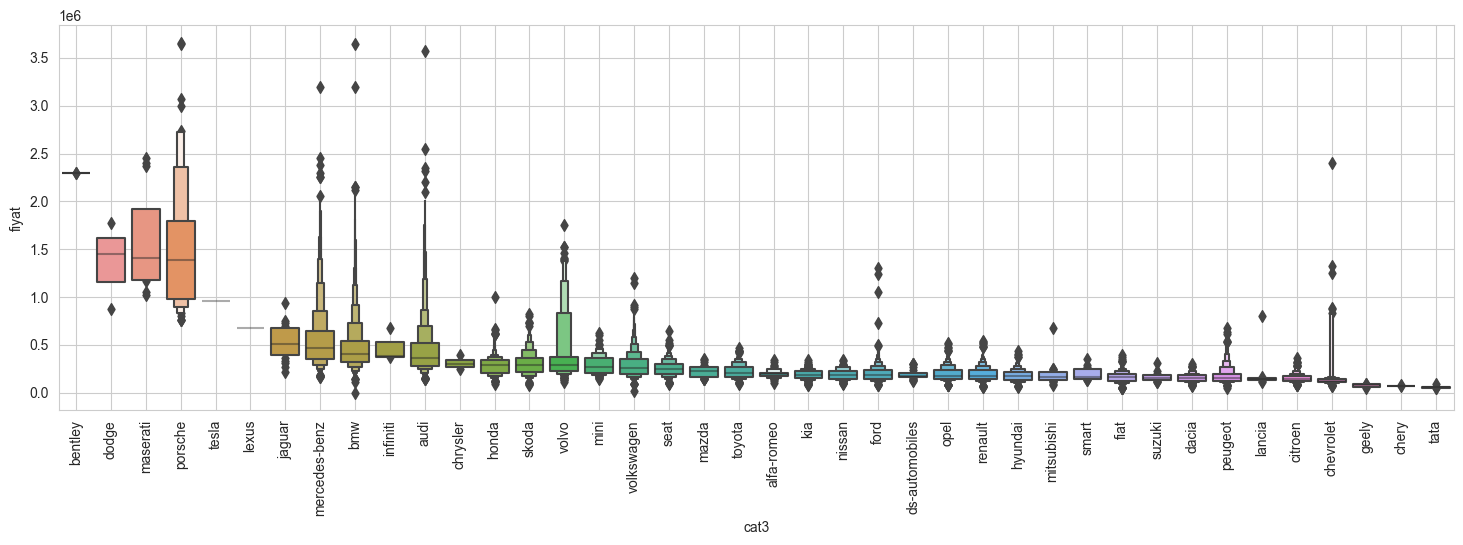

In [7]:
fig, ax = plt.subplots(figsize=(18, 5))
sns.boxenplot(data=df_cropped, x="cat3", y="fiyat", order=cat3_order, ax=ax)
# sns.scatterplot(data=df_cat3_by_year_base, x="cat3", y="fiyat", size="yil", hue="yil", ax=ax, palette=sns.color_palette("tab10"), alpha=0.5)
plt.grid(True)
plt.xticks(rotation=90);

In [8]:
from scipy.stats import norm
from scipy import stats
def make_normal(col, log=False):
    if log:
            array = np.log(df_cropped[col]).replace(-np.inf, 0).replace(np.inf, 0)
    else:
        array = df_cropped[col]
        
    fig, ax = plt.subplots(figsize=(15, 5))
    sns.distplot(array, fit=norm)
    plt.show()
    stats.probplot(array, plot=plt)


/var/folders/sr/r72219hj06x_1xvw7hhd517h0000gn/T/ipykernel_33915/3245874366.py:10: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




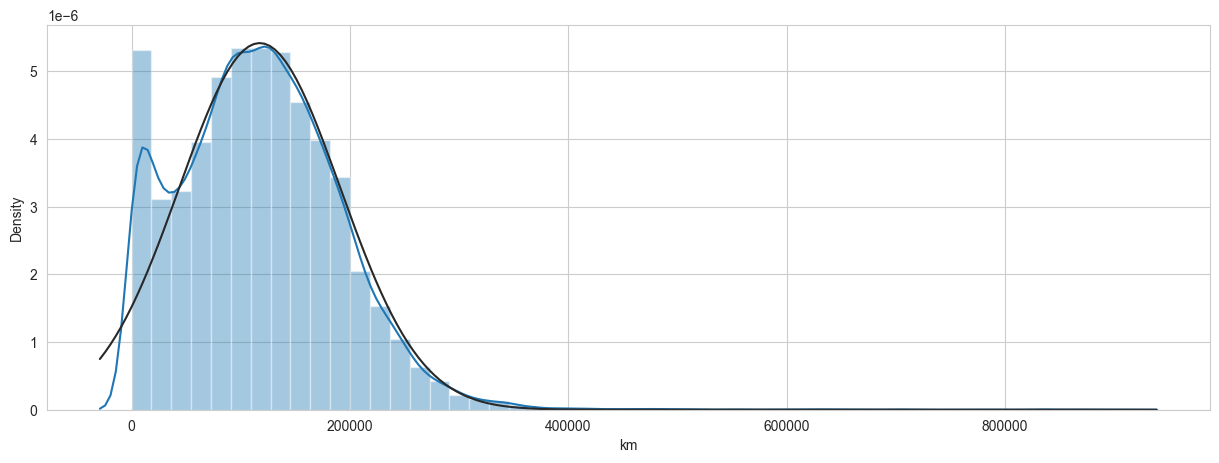

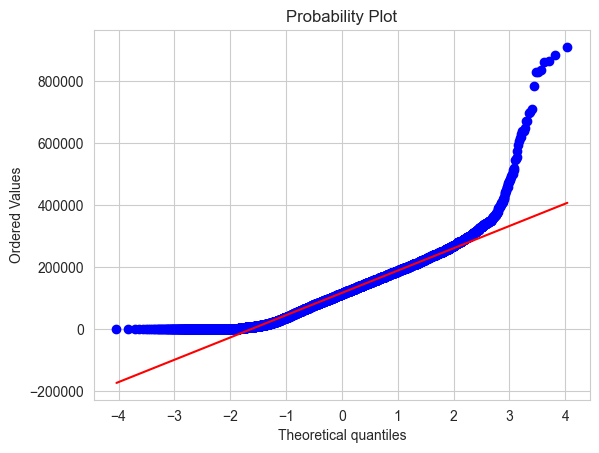

In [9]:
make_normal("km", log=False)

/var/folders/sr/r72219hj06x_1xvw7hhd517h0000gn/T/ipykernel_33915/608756220.py:1: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




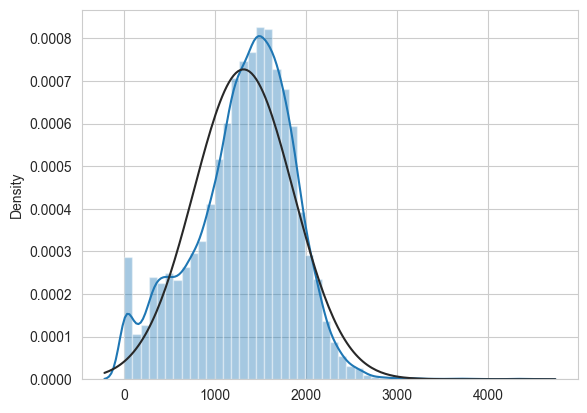

((array([-4.03774276, -3.82457427, -3.7080547 , ...,  3.7080547 ,
          3.82457427,  4.03774276]),
  array([   0.        ,    0.        ,    0.        , ..., 4394.15804182,
         4452.09905833, 4523.74459551])),
 (542.7383445455777, 1312.8291940881852, 0.9893917105267843))

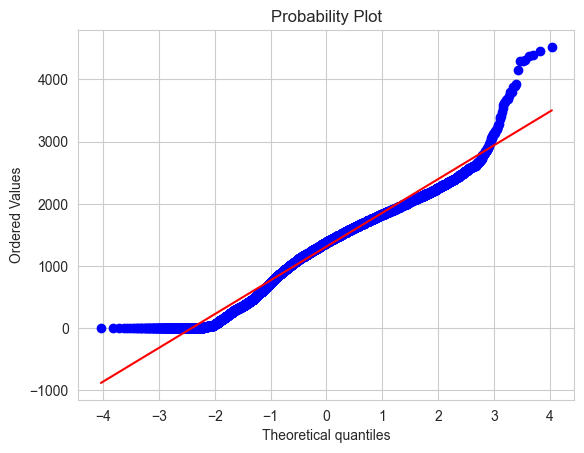

In [10]:
sns.distplot(stats.yeojohnson(df_cropped["km"])[0], fit=norm)
plt.show()
stats.probplot(stats.yeojohnson(df_cropped["km"])[0], plot=plt)

In [11]:
df_cropped["km_trans"] = stats.yeojohnson(df_cropped["km"])[0]

/var/folders/sr/r72219hj06x_1xvw7hhd517h0000gn/T/ipykernel_33915/1122800294.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



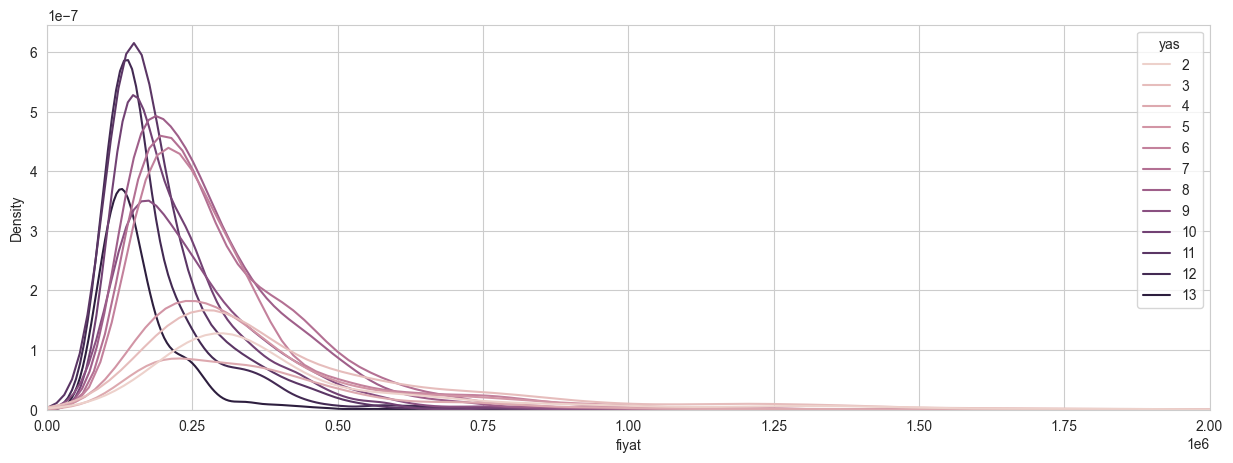

In [12]:
fig, ax = plt.subplots(figsize=(15, 5))
sns.kdeplot(x="fiyat", data=df_cropped, fill=False, hue="yas", ax=ax);
plt.xlim((0, 2000000));

/var/folders/sr/r72219hj06x_1xvw7hhd517h0000gn/T/ipykernel_33915/3268989393.py:1: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




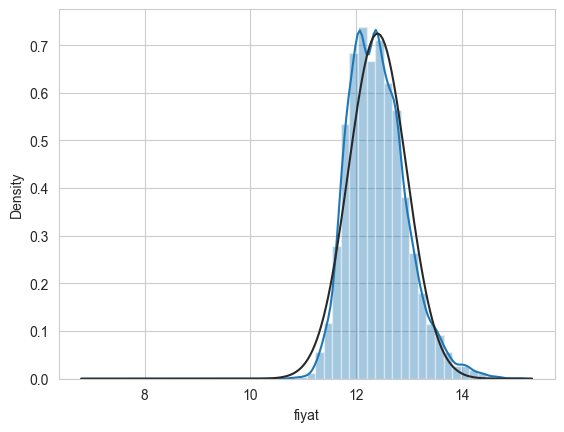

/var/folders/sr/r72219hj06x_1xvw7hhd517h0000gn/T/ipykernel_33915/3268989393.py:3: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




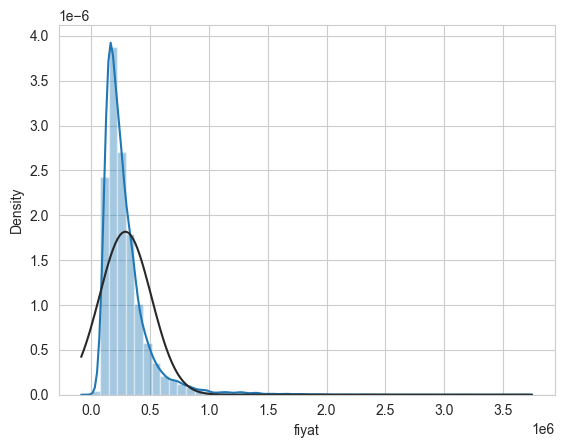

In [13]:
sns.distplot(np.log(df_cropped["fiyat"]), fit=norm)
plt.show()
sns.distplot(df_cropped["fiyat"], fit=norm)
plt.show()

In [14]:
df_cropped["fiyat_trans"] = np.log(df_cropped["fiyat"])

/var/folders/sr/r72219hj06x_1xvw7hhd517h0000gn/T/ipykernel_33915/3642412075.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



(0.0, 2500000.0)

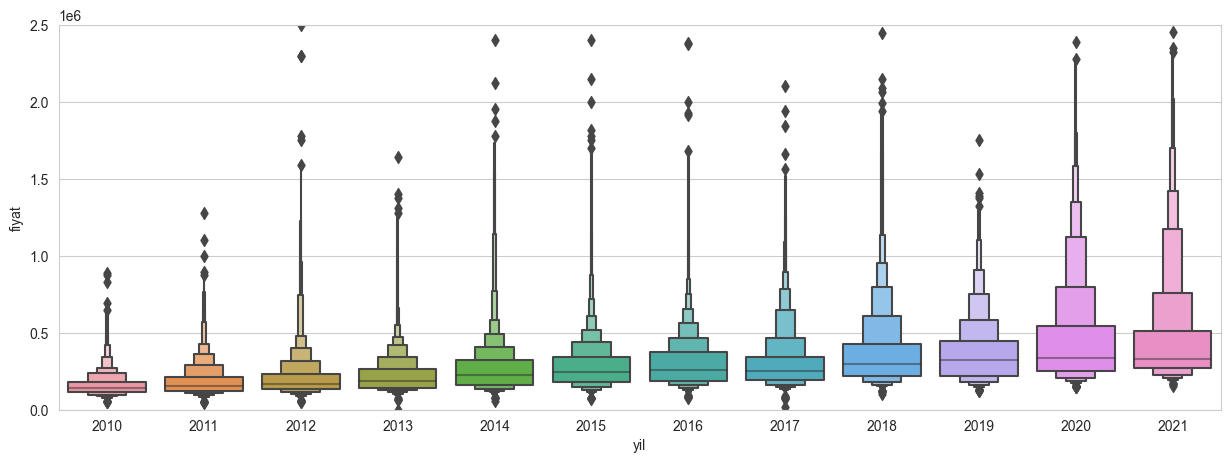

In [15]:
# sns.kdeplot(x="yil", y="fiyat", data=df.query("fiyat < 4000000"), fill=True);
fig, ax = plt.subplots(figsize=(15, 5))
sns.boxenplot(data=df_cropped, y="fiyat", x="yil")
plt.ylim((0, 2500000))

<Axes: xlabel='km_trans', ylabel='fiyat_trans'>

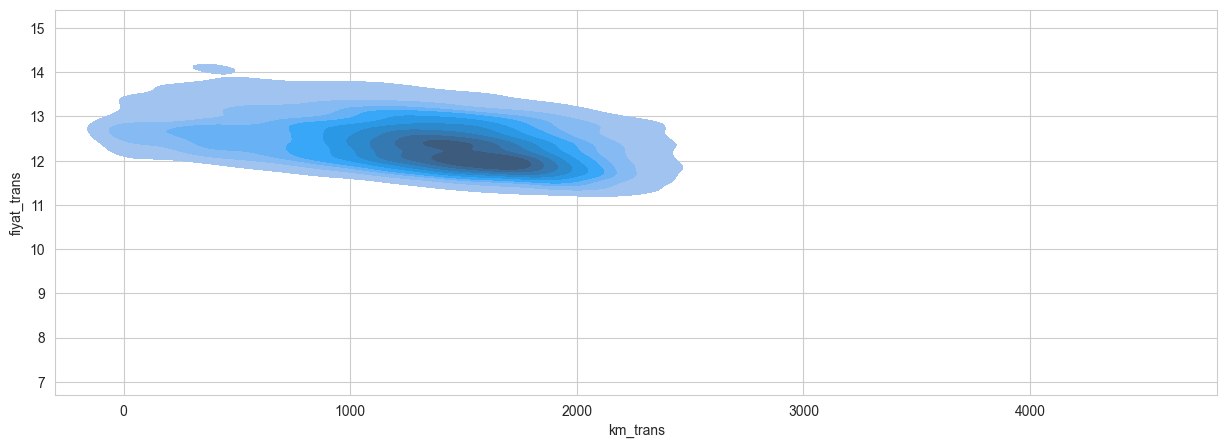

In [16]:
fig, ax = plt.subplots(figsize=(15, 5))
sns.kdeplot(x="km_trans", y="fiyat_trans", data=df_cropped, fill=True)
# plt.ylim((0, 1500000))
# plt.xlim((0, 50000))

In [7]:
from transformers import AutoTokenizer, AutoModelForQuestionAnswering, pipeline

tokenizer = AutoTokenizer.from_pretrained("savasy/bert-base-turkish-squad")
model = AutoModelForQuestionAnswering.from_pretrained("savasy/bert-base-turkish-squad")
nlp = pipeline("question-answering", model=model, tokenizer=tokenizer)

In [18]:
from zemberek import (
    TurkishSentenceNormalizer,
    TurkishMorphology,
)


morphology = TurkishMorphology.create_with_defaults()
normalizer = TurkishSentenceNormalizer(morphology)
normalize_fn = lambda x: normalizer.normalize(x)
def normalize_fn(x):
    res = normalizer.normalize(x)
    res = nlp(question=["tramer tutarı kaç?", "değişenli mi?", "boyalı mı?"], context=res)
    return res
normalize_fn = np.vectorize(normalize_fn)

2023-03-08 00:28:38,045 - zemberek.morphology.turkish_morphology - INFO
Msg: TurkishMorphology instance initialized in 5.2363481521606445



In [ ]:
a = normalize_fn(df["description"].to_numpy())

In [9]:
texts = df.loc[df["description"].str.contains("tramer")].iloc[:, 2].values
texts = iter(texts)

In [103]:
text = next(texts)
print(text)

Aracım 2015 model titanium_x paket en dolu versiyonu full ford yetkili servis bakımlı.Bakımları yeni,aküsü yeni 5 yıl garantili,Lastikler %80.DEĞİŞEN YOK.BOYA YOK.SÖK TAK YOK.(sol arka kapı altı ve sol arka çamurluk birleşim yeri 10 cm lokal boya)Ezik çizik göçük vs yoktur.ÖZELLİKLERİ İLANIN ALT KISMINDA İŞARETLENMİŞTİR. Elektronik açılır kapanır bagaj mevcut.iç dış kozmetiği 0 araçtan farksız.2 bin TL tramer kaydı mevcut.


In [104]:
print(normalizer.normalize(text))

aracım 2015 model titanıum_x paket en dolu versiyonu full ford yetkili servis bakımlı . bakımları yeni , aküsü yeni 5 yıl garantili , lastikler %80. değişen yok . boya yok . sök tak yok . ( sol arka kapı altı ve sol arka çamurluk birleşim yeri 10 cm lokal boya ) ezik çizik göçük vs yoktur . özellikleri ilanın alt kısmında işaretlenmiştir . elektronik açılır kapanır bagaj mevcut . iç dış kozmetiği 0 araçtan farksız . 2 bin tl tramer kaydı mevcut .


In [105]:
print(nlp(question="tramer tutarı kaç?", context=normalizer.normalize(text)))


{'score': 0.9999880790710449, 'start': 420, 'end': 428, 'answer': '2 bin tl'}


In [10]:
def extract_tramer(x):
    text = normalizer.normalize(x)
    result = nlp(question=["tramer tutarı kaç?", "değişenli mi?", "boyalı mı?"], context=text)
    return result

In [10]:
dnm = df.copy()#.loc[df["description"].str.contains("tramer")].iloc[:10]
dnm["tramer"] = dnm["description"].map(extract_tramer)
dnm

,adid,title,description,datestring,date,cat1,cat2,cat3,cat4,cat5,cat6,cat0,loc1,loc2,loc3,loc4,loc5,yil,yakit,vites,km,kasatipi,motorgucu,motorhacmi,cekis,renk,garanti,kimden,fiyat,url,checked,frontbumper,fronthood,roof,frontrightmudguard,frontrightdoor,rearrightdoor,rearrightmudguard,frontleftmudguard,frontleftdoor,rearleftdoor,rearleftmudguard,rearhood,rearbumper,slacklabel,ABC,ABS,AEB,EBP,ASR,ESPVSA,Airmatic,EDL,EBA,EBD,TCS,BAS,Distronic,YokuşKalkışDesteği,ZırhlıAraç,GeceGörüş,ŞerittenAyrılmaİkazı,ŞeritDeğiştirmeYardımcısı,HavaYastığıSürücü,HavaYastığıYolcu,HavaYastığıYan,HavaYastığıDiz,HavaYastığıPerde,HavaYastığıTavan,KörNoktaUyarıSistemi,LastikArızaGöstergesi,YorgunlukTespitSistemi,Isofix,Alarm,ÇocukKilidi,MerkeziKilit,Immobilizer,DeriKoltuk,KumaşKoltuk,DeriKumaşKoltuk,ElektrikliÖnCamlar,ElektrikliArkaCamlar,KlimaAnalog,KlimaDijital,OtmKararanDikizAynası,ÖnKolDayama,ArkaKolDayama,AnahtarsızGirişveÇalıştırma,num6İleriVites,num7İleriVites,HidrolikDireksiyon,FonksiyonelDireksiyon,AyarlanabilirDireksiyon,DeriDireksiyon,AhşapDireksiyon,IsıtmalıDireksiyon,KoltuklarElektrikli,KoltuklarHafızalı,KoltuklarKatlanır,KoltuklarÖnIsıtmalı,KoltuklarArkaIsıtmalı,KoltuklarSoğutmalı,HızSabitleyici,AdaptiveCruiseControl,SoğutmalıTorpido,YolBilgisayarı,KromKaplama,AhşapKaplama,HeadupDisplay,StartStop,GeriGörüşKamerası,ÖnGörüşKamerası,num3SıraKoltuk,Hardtop,FarLED,FarHalojen,FarXenon,FarBiXenon,FarSis,FarAdaptif,FarGeceSensörü,FarYıkama,AynalarElektrikli,AynalarOtomKatlanır,AynalarIsıtmalı,AynalarHafızalı,ParkSensörüArka,ParkSensörüÖn,ParkAsistanı,AlaşımlıJant,Sunroof,PanoramikCamTavan,YağmurSensörü,ArkaCamBuzÇözücü,PanoramikÖnCam,RomörkÇekiDemiri,AkıllıBagajKapağı,RadyoKasetçalar,RadyoCDÇalar,RadyoMP3Çalar,Navigasyon,TV,BluetoothTelefon,USBAUX,AUX,iPodBağlantısı,num6Hoparlör,CDDeğiştirici,ArkaEğlencePaketi,DVDDeğiştirici,tramer
0,951495082,AE MOTORS TR'DE TEK HATASIZ&BOYASIZ+TRAMERSİZ+...,2014 MODEL BMW 118İ 4 SİLİNDİR 170 HP\nORJİNAL...,01 Ekim 2021,2021-10-01,vasita,otomobil,bmw,1-serisi,118i,m-plus,vasita-otomobil-bmw-1-serisi-118i-m-plus,turkiye,istanbul,esenyurt,esenyurt,gokevler-mh.,2014,benzin,otomatik,100000,hatchback-5-kapi,170,1598,arkadan-itis,mavi,hayir,galeriden,289500,https://www.sahibinden.com/ilan/vasita-otomobi...,None,original,original,original,original,original,original,original,original,original,original,original,original,original,None,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,1,1,1,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,1,1,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,1,0,1,0,0,1,1,0,0,0,0,0,"{'score': 0.5926451086997986, 'start': 903, 'e..."
1,945820122,"""TÜRKİYEDE İLK VE TEK İÇ DIŞ YENİ KASA C200 AM...",İLETİŞİM\n0530 926 17 64\n0532 362 70 32\nMERC...,02 Ekim 2021,2021-10-02,vasita,otomobil,mercedes-benz,c-serisi,c-200,amg,vasita-otomobil-mercedes-benz-c-serisi-c-200-amg,turkiye,istanbul,kadikoy,merdivenkoy,merdivenkoy-mh.,2021,benzin,otomatik,0,sedan,201_225,1301_1600,arkadan-itis,siyah,evet,galeriden,999000,https://www.sahibinden.com/ilan/vasita-otomobi...,None,original,original,original,original,original,original,original,original,original,original,original,original,original,None,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"{'score': 2.8816882213789086e-10, 'start': 408..."
2,945858258,YENİ KASA TR DE İLK VE TEK MERCEDES C200 AMG A...,İLETİŞİM\n0530 926 17 64\n0532 362 70 32\nMERC...,02 Ekim 2021,2021-10-02,vasita,otomobil,mercedes-benz,c-serisi,c-200,amg,vasita-otomobil-mercedes-benz-c-serisi-c-200-amg,turkiye,istanbul,kadikoy,merdivenkoy,merdivenkoy-mh.,2021,benzin,otomatik,0,sedan,201_225,1301_1600,arkadan-itis,beyaz,evet,galeriden,999000,https://www.sahibinden.com/ilan/vasita-otomobi...,None,original,original,original,original,original,original,original,original,original,original,original,original,

In [15]:
dnm["tramer"].iloc[0]#.explode("tramer")

{'score': 0.5926451086997986,
 'start': 903,
 'end': 915,
 'answer': 'tramer : yok'}

In [114]:
df.loc[df["description"].str.contains("tramer")].iloc[8, 2]

'Siyah/kırmızı Çift Renk 13.000 Km\n(Sol ön çamurluk değişik dağ arka çamurluk boyalı 54000₺ tramer)\nBaşka kusuru Yoktur İçide Dışıda Tertemiz sıfır Ayarındadır Ekran ve Paspas altı Jelatinleri dahi Durmaktadır\nDijital Kullanım Klavuzu,Orijinal Avadanlığı, sıfır Durumdadır\n(189000 NET SON FİYATTIR)\nDONANIM\nCİTROEN LED VİSİON FARLAR(UZUN/KISA LED HARİKA AYDINLATMA)\nŞERİT İHLALİ UYARI SİSTEMİ\nTABELA TANIMA(SEYRETTİĞİNİZ YOLDA KAÇ KM HIZ SINIRI OLDUĞUNU GÖSTERİR)\nMİRROR LİNK TELEFON BAĞLANTISI(Gelen Mesajları Sesli Okuma Dahil)\nHIZ SABİTLEYİCİ/SINIRLAYICI\nSTART STOP SİSTEMİ\nOTOMATİK KATLANIR DİKİZ AYNASI(ARACI KİLİTLEYİNCE KAPANIR KİLİDİ AÇINCA OTOMATİK AÇILIR)\nDOKUNMATİK MULTİMEDYA EKRANI\nEKRANDA 3 FARKLI RENK SEÇENEĞİ\nUSB GİRİŞİ\nTORPİDO İÇİNDE AUX GİRİŞİ\n6 ADET HAVA YASTIĞI\nLASTİK BASINÇ SENSÖRÜ\nOTOMATİK KLİMA\nYOKUŞ KALKIŞ DESTEK SİSTEMİ(KESİNLİKLE KAYDIRMAZ)\nEAT 6 İLERİ OTOMATİK ŞANZIMAN\n1.2 PURETECH TURBO DESTEKLİ 110 BEYGİR ÇOK CANLI BİR MOTORA SAHİPTİR\nSPOR MOD

In [ ]:
dnm = pd.read_csv("data/tramer.csv")
dnm

In [124]:
dnm.loc[(dnm["description"].str.contains("tramer")) & (dnm["tramer"].map(lambda x: isinstance(x, str)))][["description", "tramer"]].tail(30)

,description,tramer
24147,Aracım 96 binde aktif kullanıyorum km değişebi...,tramer yok
24157,-Aracımın Yağ Ve Sıvı Bakımları 2.000 km Önce ...,2000₺
24159,Aracım 2017 model olup tavan ve bagaj hariç bo...,21 bin tl
24160,Araç ikinci sahibinden olup fotoğraflarda görü...,6500
24170,"Merhaba aracim düşük kilometreli,86 bindedir.\...",1600
24177,Araca ait fotoğraflar-ekspertiz ve trameri fot...,%1
24188,"Aracın ikinci sahibiyim, 5 yıldır kullanıyorum...",bin tramer kaydı çıkmaktadır
24209,Aracın sol çamurluk değişen sol tarafında boya...,ciddi alıcılar iletişime geçerse memnun olurum
24225,2012 model 196km Aracım değişensiz tertemiz tü...,1.340 ₺
24254,Aracım temiz günlük kullandığım araçtır herhan...,aracın expertiz raporu fotoğraflarda mevcuttur


In [130]:
dnm.loc[24368: 24368, "description"].values

array(['Aracım son derece bakımlıdır. Motor şanzıman bakımları eksiksiz yapılmıştır. Lastikler gayet iyi durumdadır. Araçta deforme ezik çizik bulunmamaktadır. Sıfır araç kondisyonundadır. Alt takımda en ufak ses yoktur. Tampon ve dar değişiminden kaynaklı normal 28bin tramer kaydı vardır. Keyifle bindiğim araçtır.'],
      dtype=object)

In [145]:
text = dnm.loc[24288, "description"]
print(text)
nlp(question=["tramer tutarı kaç?", "değişenli mi?", "boyalı mı?"], context=text)

Sağ iki kapı sürtmeden dolayı boyalı hasar kaydı trameri yoktur
Bütün 100 bin. Ağır bakımları yapılmıştır
Akü - kavrama seti ve lastikleri yeni takılmıştır


[{'score': 0.9045947790145874, 'start': 70, 'end': 77, 'answer': '100 bin'},
 {'score': 0.3846062123775482,
  'start': 106,
  'end': 155,
  'answer': 'Akü - kavrama seti ve lastikleri yeni takılmıştır'},
 {'score': 0.813723623752594,
  'start': 0,
  'end': 63,
  'answer': 'Sağ iki kapı sürtmeden dolayı boyalı hasar kaydı trameri yoktur'}]

In [8]:
cluster = df.query("fiyat < 2000000 and fiyat > 75000").reset_index(drop=True)
cluster_yil = cluster["yil"].tolist()
cluster_series = cluster["cat4"].tolist()
cluster_brand = cluster["cat3"].tolist()

cluster = cluster.loc[:, "ABC":]
cluster

,ABC,ABS,AEB,EBP,ASR,ESPVSA,Airmatic,EDL,EBA,EBD,TCS,BAS,Distronic,YokuşKalkışDesteği,ZırhlıAraç,GeceGörüş,ŞerittenAyrılmaİkazı,ŞeritDeğiştirmeYardımcısı,HavaYastığıSürücü,HavaYastığıYolcu,HavaYastığıYan,HavaYastığıDiz,HavaYastığıPerde,HavaYastığıTavan,KörNoktaUyarıSistemi,LastikArızaGöstergesi,YorgunlukTespitSistemi,Isofix,Alarm,ÇocukKilidi,MerkeziKilit,Immobilizer,DeriKoltuk,KumaşKoltuk,DeriKumaşKoltuk,ElektrikliÖnCamlar,ElektrikliArkaCamlar,KlimaAnalog,KlimaDijital,OtmKararanDikizAynası,ÖnKolDayama,ArkaKolDayama,AnahtarsızGirişveÇalıştırma,num6İleriVites,num7İleriVites,HidrolikDireksiyon,FonksiyonelDireksiyon,AyarlanabilirDireksiyon,DeriDireksiyon,AhşapDireksiyon,IsıtmalıDireksiyon,KoltuklarElektrikli,KoltuklarHafızalı,KoltuklarKatlanır,KoltuklarÖnIsıtmalı,KoltuklarArkaIsıtmalı,KoltuklarSoğutmalı,HızSabitleyici,AdaptiveCruiseControl,SoğutmalıTorpido,YolBilgisayarı,KromKaplama,AhşapKaplama,HeadupDisplay,StartStop,GeriGörüşKamerası,ÖnGörüşKamerası,num3SıraKoltuk,Hardtop,FarLED,FarHalojen,FarXenon,FarBiXenon,FarSis,FarAdaptif,FarGeceSensörü,FarYıkama,AynalarElektrikli,AynalarOtomKatlanır,AynalarIsıtmalı,AynalarHafızalı,ParkSensörüArka,ParkSensörüÖn,ParkAsistanı,AlaşımlıJant,Sunroof,PanoramikCamTavan,YağmurSensörü,ArkaCamBuzÇözücü,PanoramikÖnCam,RomörkÇekiDemiri,AkıllıBagajKapağı,RadyoKasetçalar,RadyoCDÇalar,RadyoMP3Çalar,Navigasyon,TV,BluetoothTelefon,USBAUX,AUX,iPodBağlantısı,num6Hoparlör,CDDeğiştirici,ArkaEğlencePaketi,DVDDeğiştirici
0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,1,1,1,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,1,1,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,1,0,1,0,0,1,1,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,1,1,0,1,1,0,0,0,1,1,1,0,1,0,0,0,0,1,1,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,1,1,1,0,1,1,1,1,0,0,1,0,1,1,0,0,1,0,0,1,0,0,1,0,1,1,0,1,0,1,1,1,0,0,0,0,0,0,1,1,1,1,1,1,1,0,1,1,1,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25557,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
25558,1,1,1,1,1,1,0,1,0,1,1,1,0,1,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,0,0,1,0,0,0,0,0,1,0,1,1,1,0,0,1,1,1,0,0,1,0,0,1,1,1,1,1,1,1,1,0,1,1,1,1,0,0,1,1,0,0,1,0,0,0,0,0,1,1,1,1,1,0,0,0
25559,0,1,0,0,1,1,0,0,0,1,1,1,0,1,0,0,0,0,1,1,0,1,0,0,0,1,0,1,0,1,1,1,0,1,0,1,1,1,0,0,1,0,0,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,1,0,1,1,1,0,1,0,0,0
25560,0,1,1,0,1,1,0,0,0,1,1,1,0,1,0,0,0,0,1,1,0,1,0,0,0,1,0,1,0,0,1,0,0,0,1,1,1,1,0,0,1,1,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,1,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1


In [ ]:
from sklearn.cluster import AgglomerativeClustering, DBSCAN
from scipy.spatial.distance import hamming
# cls = AgglomerativeClustering(metric="hamming", linkage=)
# cls = DBSCAN(eps=0.1, metric=hamming)
# cls.fit(cluster);
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

tsne = TSNE()
tsne_results = tsne.fit_transform(cluster)


In [ ]:
pca = PCA(n_components=20)
pca_results = pca.fit_transform(cluster)
print(pca.explained_variance_ratio_.sum())

0.8059161399498407


In [9]:
from umap import UMAP
umap = UMAP(metric='hamming', random_state=42, low_memory=True)
umap_results = umap.fit_transform(cluster)

/Users/berkayg/miniforge3/envs/torch-gpu/lib/python3.8/site-packages/umap/umap_.py:1802: UserWarning: gradient function is not yet implemented for hamming distance metric; inverse_transform will be unavailable
  warn(
OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


In [24]:
# df_subset = pd.DataFrame(tsne_results, columns=["tsne1", "tsne2"])
df_subset = df.copy().query("yil >= 2020")
df_subset["tsne1"] = tsne_results[:, 0]
df_subset["tsne2"] = tsne_results[:, 1]
df_subset["pca1"] = pca_results[:, 0]
df_subset["pca2"] = pca_results[:, 1]
df_subset["umap1"] = umap_results[:, 0]
df_subset["umap2"] = umap_results[:, 1]

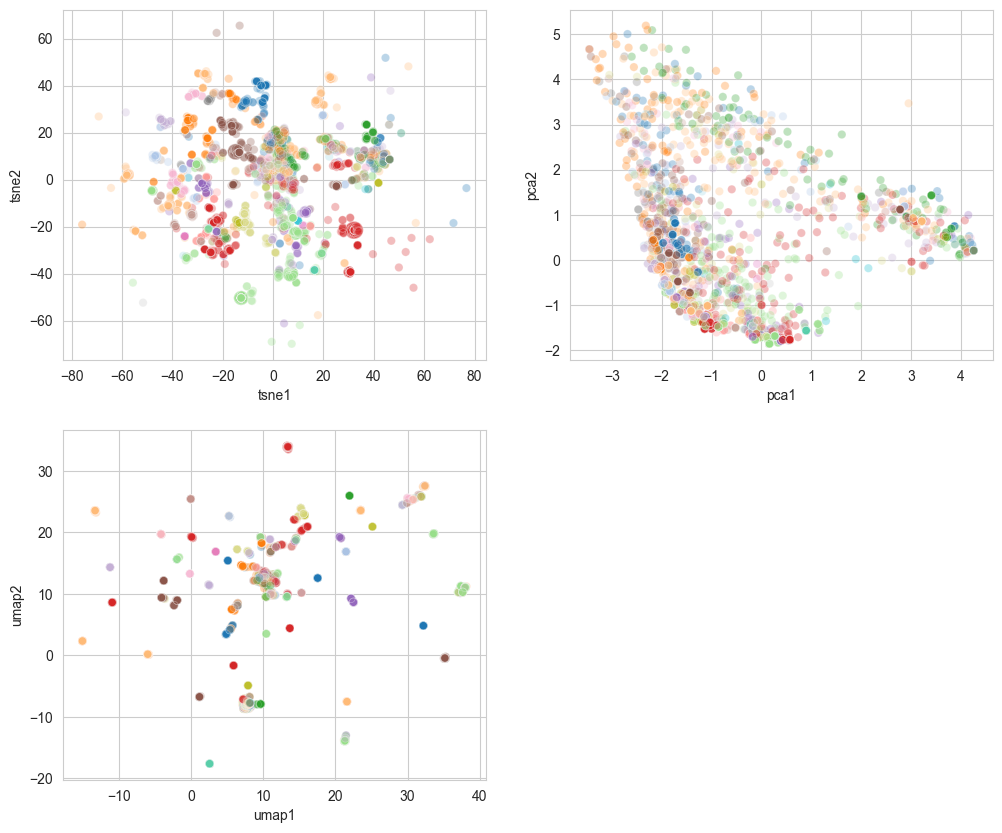

In [25]:
plt.figure(figsize=(12, 10))
plt.subplot(2, 2, 1)
sns.scatterplot(
x="tsne1", y="tsne2",
hue="cat3",
palette=sns.color_palette("tab20", df_subset["cat3"].nunique()),
data=df_subset,
legend=None,
alpha=0.3,
)

plt.subplot(2, 2, 2)
sns.scatterplot(
x="pca1", y="pca2",
hue="cat3",
palette=sns.color_palette("tab20", df_subset["cat3"].nunique()),
data=df_subset,
legend=None,
alpha=0.3,
)

plt.subplot(2, 2, 3)
sns.scatterplot(
x="umap1", y="umap2",
hue="cat3",
palette=sns.color_palette("tab20", df_subset["cat3"].nunique()),
data=df_subset,
legend=None,
alpha=0.3,
)


plt.show()

In [152]:
# plt.figure(figsize=(16,10))
# sns.scatterplot(
#     x="umap1", y="umap2",
#     hue="cat3",
#     palette=sns.color_palette("tab20", df_subset["cat3"].nunique()),
#     data=df_subset,
#     legend="full",
#     alpha=0.3
# )

In [153]:
# plt.figure(figsize=(16,10))
# sns.scatterplot(
#     x="tsne1", y="tsne2",
#     hue="cat3",
#     palette=sns.color_palette("tab20", df_subset["cat3"].nunique()),
#     data=df_subset,
#     legend="full",
#     alpha=0.1
# )

In [154]:
# plt.figure(figsize=(16,10))
# sns.scatterplot(
#     x="pca1", y="pca2",
#     hue="cat3",
#     palette=sns.color_palette("tab20", df_subset["cat3"].nunique()),
#     data=df_subset,
#     legend="full",
#     alpha=0.3
# )

In [39]:
# PAIRWISE_DISTANCE_FUNCTIONS
df.head()

,adid,title,description,datestring,date,cat1,cat2,cat3,cat4,cat5,cat6,cat0,loc1,loc2,loc3,loc4,loc5,yil,yakit,vites,km,kasatipi,motorgucu,motorhacmi,cekis,renk,garanti,kimden,fiyat,url,checked,frontbumper,fronthood,roof,frontrightmudguard,frontrightdoor,rearrightdoor,rearrightmudguard,frontleftmudguard,frontleftdoor,rearleftdoor,rearleftmudguard,rearhood,rearbumper,slacklabel,ABC,ABS,AEB,EBP,ASR,ESPVSA,Airmatic,EDL,EBA,EBD,TCS,BAS,Distronic,YokuşKalkışDesteği,ZırhlıAraç,GeceGörüş,ŞerittenAyrılmaİkazı,ŞeritDeğiştirmeYardımcısı,HavaYastığıSürücü,HavaYastığıYolcu,HavaYastığıYan,HavaYastığıDiz,HavaYastığıPerde,HavaYastığıTavan,KörNoktaUyarıSistemi,LastikArızaGöstergesi,YorgunlukTespitSistemi,Isofix,Alarm,ÇocukKilidi,MerkeziKilit,Immobilizer,DeriKoltuk,KumaşKoltuk,DeriKumaşKoltuk,ElektrikliÖnCamlar,ElektrikliArkaCamlar,KlimaAnalog,KlimaDijital,OtmKararanDikizAynası,ÖnKolDayama,ArkaKolDayama,AnahtarsızGirişveÇalıştırma,num6İleriVites,num7İleriVites,HidrolikDireksiyon,FonksiyonelDireksiyon,AyarlanabilirDireksiyon,DeriDireksiyon,AhşapDireksiyon,IsıtmalıDireksiyon,KoltuklarElektrikli,KoltuklarHafızalı,KoltuklarKatlanır,KoltuklarÖnIsıtmalı,KoltuklarArkaIsıtmalı,KoltuklarSoğutmalı,HızSabitleyici,AdaptiveCruiseControl,SoğutmalıTorpido,YolBilgisayarı,KromKaplama,AhşapKaplama,HeadupDisplay,StartStop,GeriGörüşKamerası,ÖnGörüşKamerası,num3SıraKoltuk,Hardtop,FarLED,FarHalojen,FarXenon,FarBiXenon,FarSis,FarAdaptif,FarGeceSensörü,FarYıkama,AynalarElektrikli,AynalarOtomKatlanır,AynalarIsıtmalı,AynalarHafızalı,ParkSensörüArka,ParkSensörüÖn,ParkAsistanı,AlaşımlıJant,Sunroof,PanoramikCamTavan,YağmurSensörü,ArkaCamBuzÇözücü,PanoramikÖnCam,RomörkÇekiDemiri,AkıllıBagajKapağı,RadyoKasetçalar,RadyoCDÇalar,RadyoMP3Çalar,Navigasyon,TV,BluetoothTelefon,USBAUX,AUX,iPodBağlantısı,num6Hoparlör,CDDeğiştirici,ArkaEğlencePaketi,DVDDeğiştirici
0,951495082,AE MOTORS TR'DE TEK HATASIZ&BOYASIZ+TRAMERSİZ+...,2014 MODEL BMW 118İ 4 SİLİNDİR 170 HP\nORJİNAL...,01 Ekim 2021,2021-10-01,vasita,otomobil,bmw,1-serisi,118i,m-plus,vasita-otomobil-bmw-1-serisi-118i-m-plus,turkiye,istanbul,esenyurt,esenyurt,gokevler-mh.,2014,benzin,otomatik,100000,hatchback-5-kapi,170,1598,arkadan-itis,mavi,hayir,galeriden,289500,https://www.sahibinden.com/ilan/vasita-otomobi...,None,original,original,original,original,original,original,original,original,original,original,original,original,original,None,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,1,1,1,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,1,1,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,1,0,1,0,0,1,1,0,0,0,0,0
1,945820122,"""TÜRKİYEDE İLK VE TEK İÇ DIŞ YENİ KASA C200 AM...",İLETİŞİM\n0530 926 17 64\n0532 362 70 32\nMERC...,02 Ekim 2021,2021-10-02,vasita,otomobil,mercedes-benz,c-serisi,c-200,amg,vasita-otomobil-mercedes-benz-c-serisi-c-200-amg,turkiye,istanbul,kadikoy,merdivenkoy,merdivenkoy-mh.,2021,benzin,otomatik,0,sedan,201_225,1301_1600,arkadan-itis,siyah,evet,galeriden,999000,https://www.sahibinden.com/ilan/vasita-otomobi...,None,original,original,original,original,original,original,original,original,original,original,original,original,original,None,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,945858258,YENİ KASA TR DE İLK VE TEK MERCEDES C200 AMG A...,İLETİŞİM\n0530 926 17 64\n0532 362 70 32\nMERC...,02 Ekim 2021,2021-10-02,vasita,otomobil,mercedes-benz,c-serisi,c-200,amg,vasita-otomobil-mercedes-benz-c-serisi-c-200-amg,turkiye,istanbul,kadikoy,merdivenkoy,merdivenkoy-mh.,2021,benzin,otomatik,0,sedan,201_225,1301_1600,arkadan-itis,beyaz,evet,galeriden,999000,https://www.sahibinden.com/ilan/vasita-otomobi...,None,original,original,original,original,original,original,original,original,original,original,original,original,original,None,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [10]:
df_model = df.query("fiyat < 2000000 and fiyat > 75000").reset_index(drop=True)
df_model = pd.concat([df_model, pd.DataFrame(umap_results, columns=["umap1", "umap2"])], axis=1)
df_model["make"] = df_model["cat3"] + " " + df_model["cat4"] + " " + df_model["cat5"] + " " + df_model["cat6"].fillna("")
df_model["make"] = df_model["make"].str.strip()
df_model["yas"] = 2023 - df_model["yil"]
# df_model["yas"] = pd.cut(df_model["yas"], bins=[0, 3, 6, 9, 30], labels=[1, 2, 3, 4])#["yeni", "orta_yeni", "orta_yasli", "yasli"]
df_model.drop(columns=["yil"], inplace=True)
df_model = df_model[["make", "yas", "yakit", "vites", "km", "umap1", "umap2", "fiyat"]]
df_model

,make,yas,yakit,vites,km,umap1,umap2,fiyat
0,bmw 1-serisi 118i m-plus,9,benzin,otomatik,100000,20.969948,8.828899,289500
1,mercedes-benz c-serisi c-200 amg,2,benzin,otomatik,0,13.057933,-5.854658,999000
2,mercedes-benz c-serisi c-200 amg,2,benzin,otomatik,0,13.069131,-6.113030,999000
3,mercedes-benz c-serisi c-200 amg,2,benzin,otomatik,0,13.121567,-5.951018,999000
4,volkswagen passat 1.6-tdi-bluemotion highline,7,dizel,yari-otomatik,160000,-1.274820,19.914892,415000
...,...,...,...,...,...,...,...,...
25557,skoda superb 2.0-tdi elegance,9,dizel,yari-otomatik,179150,10.227388,-1.879896,316000
25558,renault megane 1.5-dci icon,5,dizel,yari-otomatik,68000,3.655324,8.305577,408000
25559,hyundai accent-blue 1.6-crdi mode-plus,8,dizel,yari-otomatik,72000,-0.847293,5.396955,255000
25560,volkswagen golf 1.6-tdi bluemotion-comfortline,4,dizel,yari-otomatik,29200,-2.181002,21.992256,485000


In [21]:
df_model.loc[df_model["umap1"].isna()]

,make,yas,yakit,vites,km,umap1,umap2,fiyat


In [12]:
import category_encoders as ce
# ce.HashingEncoder(cols=["make"]).fit_transform(df)
# ce.HashingEncoder?

In [118]:
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import r2_score
from category_encoders import TargetEncoder


X_train, X_test, y_train, y_test = train_test_split(df_model.drop(columns=["fiyat"]), df_model["fiyat"], random_state=22, test_size=0.25)
# cb_encoder = ce.cat_boost.CatBoostEncoder(cols=["make"])
cb_encoder = ce.TargetEncoder(cols=["make"])
# cb_encoder = ce.HashingEncoder(cols=["make"], n_components=10)

oh_encoder = ce.OneHotEncoder(cols=["yakit", "vites"])

train = cb_encoder.fit_transform(X_train, y_train)
train = oh_encoder.fit_transform(train).assign(fiyat=y_train).drop(columns=["yakit_1", "vites_1"])

test = cb_encoder.transform(X_test, y_test)
test = oh_encoder.transform(test).assign(fiyat=y_test).drop(columns=["yakit_1", "vites_1"])

In [119]:
train

,make,yas,yakit_2,yakit_3,yakit_4,yakit_5,vites_2,vites_3,km,umap1,umap2,fiyat
8829,270439.694750,7,0,0,0,0,0,0,101000,-2.405241,11.741367,157500
11049,286507.360887,8,1,0,0,0,1,0,174000,2.559209,10.877686,229999
21267,845101.605015,4,0,0,0,0,1,0,27606,3.770476,7.387562,850000
9385,349482.850557,7,0,0,0,0,0,1,172000,7.255359,20.481956,340000
2057,233228.904613,12,0,1,0,0,0,0,110000,12.647579,-6.357312,96000
...,...,...,...,...,...,...,...,...,...,...,...,...
23030,130988.577217,6,1,0,0,0,0,0,114000,-7.164250,-4.702409,172500
21862,282442.614755,7,0,1,0,0,1,0,70000,2.059410,-2.125911,297500
24932,333635.681452,5,1,0,0,0,0,1,63000,16.198109,8.757833,517750
22660,268752.174516,13,0,0,0,0,0,1,150000,19.172256,8.072538,147000


In [120]:
X_train, y_train = train.drop(columns=["fiyat"]), train["fiyat"]
X_test, y_test = test.drop(columns=["fiyat"]), test["fiyat"]

# y_train = np.log1p(y_train)
# y_test = np.log1p(y_test)

In [121]:
X_train

,make,yas,yakit_2,yakit_3,yakit_4,yakit_5,vites_2,vites_3,km,umap1,umap2
8829,270439.694750,7,0,0,0,0,0,0,101000,-2.405241,11.741367
11049,286507.360887,8,1,0,0,0,1,0,174000,2.559209,10.877686
21267,845101.605015,4,0,0,0,0,1,0,27606,3.770476,7.387562
9385,349482.850557,7,0,0,0,0,0,1,172000,7.255359,20.481956
2057,233228.904613,12,0,1,0,0,0,0,110000,12.647579,-6.357312
...,...,...,...,...,...,...,...,...,...,...,...
23030,130988.577217,6,1,0,0,0,0,0,114000,-7.164250,-4.702409
21862,282442.614755,7,0,1,0,0,1,0,70000,2.059410,-2.125911
24932,333635.681452,5,1,0,0,0,0,1,63000,16.198109,8.757833
22660,268752.174516,13,0,0,0,0,0,1,150000,19.172256,8.072538


In [122]:
from sklearn.neighbors import KNeighborsRegressor

In [158]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
model = XGBRegressor(n_estimators=700, max_depth=7, learning_rate=0.005)
# model = Ridge()
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
model.fit(X_train_scaled, y_train);

In [159]:
from sklearn.model_selection import train_test_split, cross_validate, StratifiedKFold

pred_train = model.predict(X_train_scaled)
pred_test = model.predict(X_test_scaled)

# pred_train = np.expm1(pred_train)
# pred_test = np.expm1(pred_test)
# y_train = np.expm1(y_train)
# y_test = np.expm1(y_test)

# print(r2_score(pred_train, y_train))
# print(r2_score(pred_test, y_test))

stratified_kfold = StratifiedKFold(n_splits=5,
                                   shuffle=True,
                                   random_state=11)

# cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=5, random_state=1)
scores = cross_validate(model, X_test_scaled, y_test, cv=stratified_kfold, return_train_score=True)
pd.DataFrame(scores).agg({"test_score": "describe", "train_score": "describe"}).loc[["mean", "std"]]

/Users/berkayg/miniforge3/envs/torch-gpu/lib/python3.8/site-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


,test_score,train_score
mean,0.810245,0.925554
std,0.031361,0.003032


In [33]:
z = df.query("fiyat < 2000000 and fiyat > 75000").reset_index(drop=True)
z = z.assign(make=z["cat3"] + " " + z["cat4"] + " " + z["cat5"] + " " + z["cat6"].fillna(""))
z.loc[z["make"].isna()][["cat3", "cat4", "cat5", "cat6", "make"]]

,cat3,cat4,cat5,cat6,make


In [17]:
scaler = MinMaxScaler()
X_cluster = np.vstack([X_train.drop(columns=["umap1", "umap2"]), X_test.drop(columns=["umap1", "umap2"])])
X_scaled = scaler.fit_transform(X_cluster)

In [76]:
scaler = MinMaxScaler()
X_cluster = X_train.drop(columns=["umap1", "umap2"])
X_scaled = scaler.fit_transform(X_cluster)
umap = UMAP(n_neighbors=65, random_state=42, low_memory=True)
umap_results = umap.fit_transform(X_scaled)

df_umap = pd.concat([X_train, y_train], axis=1)
df_umap = df_umap.merge(df_model["make"], left_index=True, right_index=True, how="left")
df_umap["umap1"] = umap_results[:, 0]
df_umap["umap2"] = umap_results[:, 1]
df_umap.head()


,make_x,yas,yakit_2,yakit_3,yakit_4,yakit_5,vites_2,vites_3,km,umap1,umap2,fiyat,make_y
8829,205566.502360,7,0,0,0,0,0,0,101000,5.923359,2.479129,157500,skoda fabia 1.2-tsi ambition
11049,283653.001888,8,1,0,0,0,1,0,174000,1.184029,16.302433,229999,peugeot 508 1.6-bluehdi allure
21267,850289.754552,4,0,0,0,0,1,0,27606,8.457035,17.599312,850000,bmw 3-serisi 320i first-edition-m-sport
9385,350217.071597,7,0,0,0,0,0,1,172000,13.913238,-1.418015,340000,volkswagen passat 1.4-tsi-bluemotion highline
2057,136044.000674,12,0,1,0,0,0,0,110000,18.842829,4.394327,96000,opel astra 1.6 enjoy-111-yil


In [20]:
from category_encoders.ordinal import OrdinalEncoder
from category_encoders.woe import WOEEncoder
from category_encoders.target_encoder import TargetEncoder
from category_encoders.sum_coding import SumEncoder
from category_encoders.m_estimate import MEstimateEncoder
from category_encoders.leave_one_out import LeaveOneOutEncoder
from category_encoders.helmert import HelmertEncoder
from category_encoders.cat_boost import CatBoostEncoder
from category_encoders.james_stein import JamesSteinEncoder
from category_encoders.one_hot import OneHotEncoder

In [74]:
cluster

array([[0.42155647, 0.7046887 ],
       [0.1829182 , 0.30156755],
       [0.02646971, 0.510054  ],
       ...,
       [0.67453945, 0.42688283],
       [0.59348834, 0.6751608 ],
       [0.2313393 , 0.59041715]], dtype=float32)

In [92]:
from sklearn.cluster import AgglomerativeClustering, DBSCAN
from scipy.spatial.distance import hamming
cls = DBSCAN(eps=0.0001, min_samples=5)

X_train, X_test, y_train, y_test = train_test_split(df_model.drop(columns=["fiyat"]), df_model["fiyat"], random_state=22, test_size=0.25)
# cb_encoder = CatBoostEncoder(cols=["make"])
cb_encoder = MEstimateEncoder(cols=["make"])
oh_encoder = ce.OneHotEncoder(cols=["yakit", "vites"])

train = pd.concat([X_train, y_train], axis=1)
train = cb_encoder.fit_transform(X_train, y_train)
# train["make"] = model.predict(X_train_scaled)
train = oh_encoder.fit_transform(train).assign(fiyat=y_train).drop(columns=["yakit_1", "vites_1"])

X_train, y_train = train.drop(columns=["fiyat"]), train["fiyat"]
X_test, y_test = test.drop(columns=["fiyat"]), test["fiyat"]

df_umap = pd.concat([X_train, y_train], axis=1)
df_umap = df_umap.merge(df_model["make"], left_index=True, right_index=True, how="left")
df_umap["umap1"] = umap_results[:, 0]
df_umap["umap2"] = umap_results[:, 1]

cluster = df_umap[["umap1", "umap2"]]
scaler = MinMaxScaler()
cluster = scaler.fit_transform(cluster)
df_umap["cluster"] = cls.fit_predict(cluster);
from scipy import stats
df_umap["zscore"] = df_umap.groupby("cluster")["fiyat"].transform(stats.zscore)
df_umap.sort_values("cluster", ascending=False).head(20)

,make_x,yas,yakit_2,yakit_3,yakit_4,yakit_5,vites_2,vites_3,km,umap1,umap2,fiyat,make_y,cluster,zscore
1514,270310.098515,9,0,0,0,0,0,0,100000,8.094658,-4.675561,191500,volkswagen passat 1.4-tsi-bluemotion trendline,105,0.899216
11268,161119.000674,9,0,0,0,0,0,0,103000,8.099535,-4.676042,129900,hyundai i20 1.2-mpi jump,105,-0.825308
8642,219494.000242,9,0,0,0,0,0,0,79000,8.097310,-4.674466,213000,seat leon 1.2-tsi style,105,1.501120
18499,207633.004721,9,0,0,0,0,0,0,81000,8.098549,-4.672698,128000,dacia logan 1.2-mcv ambiance,105,-0.878500
9271,210883.004721,9,0,0,0,0,0,0,83900,8.094577,-4.675960,134500,fiat panda 1.2 lounge,105,-0.696529
15607,220576.640378,6,0,0,0,0,1,0,62000,10.631164,17.484997,198000,hyundai i20 1.4-mpi jump,104,-0.397544
13340,200732.000726,6,0,0,0,0,1,0,63000,10.631438,17.485464,213500,ford fiesta 1.6 titanium-x,104,0.672235
14039,233347.149137,6,0,0,0,0,1,0,68000,10.626893,17.484493,227000,hyundai i20 1.4-mpi style,104,1.603978
7801,198615.091767,6,0,0,0,0,1,0,49000,10.630332,17.485071,192500,opel corsa 1.4 essentia,104,-0.777143
14075,194537.000525,6,0,0,0,0,1,0,68000,10.629382,17.483950,187800,opel corsa 1.4 enjoy,104,-1.101527


In [93]:
df_umap.groupby("cluster")["make_y"].count().sort_values()

cluster
 52        5
 54        5
 56        5
 63        5
 64        5
       ...  
 12       21
 6        21
 5        23
 0        24
-1     18258
Name: make_y, Length: 107, dtype: int64

In [94]:

df_umap.groupby("cluster")["fiyat"].agg(["std", "count"]).sort_values("std").head(20)

,std,count
cluster,,
74,8247.348059,5
73,8388.980868,6
75,8598.371939,5
72,11386.852799,6
47,15210.392065,8
37,15758.784398,8
20,16021.576361,11
104,16199.166645,5
80,16234.377105,6


In [96]:
df_umap.query("cluster == 20").sort_values("zscore")

,make_x,yas,yakit_2,yakit_3,yakit_4,yakit_5,vites_2,vites_3,km,umap1,umap2,fiyat,make_y,cluster,zscore
7589,323595.666842,2,0,0,0,0,1,0,0,3.049132,21.867407,295000,volkswagen polo 1.0-tsi life,20,-0.948608
6064,323595.666842,2,0,0,0,0,1,0,0,3.048240,21.866535,296000,volkswagen polo 1.0-tsi life,20,-0.883146
4332,323595.666842,2,0,0,0,0,1,0,0,3.048497,21.869959,296500,volkswagen polo 1.0-tsi life,20,-0.850414
6837,323595.666842,2,0,0,0,0,1,0,0,3.049580,21.868687,299000,volkswagen polo 1.0-tsi life,20,-0.686759
6733,323595.666842,2,0,0,0,0,1,0,20,3.049265,21.864964,299000,volkswagen polo 1.0-tsi life,20,-0.686759
10139,323595.666842,2,0,0,0,0,1,0,0,3.050994,21.866486,303500,volkswagen polo 1.0-tsi life,20,-0.392179
15294,323595.666842,2,0,0,0,0,1,0,0,3.049957,21.864714,309000,volkswagen polo 1.0-tsi life,20,-0.032136
5813,323595.666842,2,0,0,0,0,1,0,0,3.051436,21.868626,314900,volkswagen polo 1.0-tsi life,20,0.354091
15967,323595.666842,2,0,0,0,0,1,0,0,3.047542,21.866972,320000,volkswagen polo 1.0-tsi life,20,0.687949
18513,323595.666842,2,0,0,0,0,1,0,0,3.048489,21.865198,325000,volkswagen polo 1.0-tsi life,20,1.015260


In [97]:
df_umap.query("make_y == 'volkswagen polo 1.0-tsi life'").sort_values("fiyat")

,make_x,yas,yakit_2,yakit_3,yakit_4,yakit_5,vites_2,vites_3,km,umap1,umap2,fiyat,make_y,cluster,zscore
4438,323595.666842,2,0,0,0,0,0,0,0,9.011798,8.509757,257000,volkswagen polo 1.0-tsi life,-1,-0.131514
625,323595.666842,2,0,0,0,0,1,0,0,3.044856,21.938511,275900,volkswagen polo 1.0-tsi life,-1,-0.035601
3052,323595.666842,2,0,0,0,0,1,0,970,3.073001,21.738964,277500,volkswagen polo 1.0-tsi life,-1,-0.027481
733,323595.666842,2,0,0,0,0,0,1,0,15.286270,-10.318976,278900,volkswagen polo 1.0-tsi life,-1,-0.020376
2534,323595.666842,2,0,0,0,0,1,0,0,3.037579,21.879904,290000,volkswagen polo 1.0-tsi life,-1,0.035954
8404,323595.666842,2,0,0,0,0,1,0,1900,3.077220,21.807608,291500,volkswagen polo 1.0-tsi life,-1,0.043566
8355,323595.666842,2,0,0,0,0,1,0,0,2.980275,21.875154,294500,volkswagen polo 1.0-tsi life,-1,0.058790
7635,323595.666842,2,0,0,0,0,1,0,0,3.042123,21.876965,295000,volkswagen polo 1.0-tsi life,-1,0.061327
7589,323595.666842,2,0,0,0,0,1,0,0,3.049132,21.867407,295000,volkswagen polo 1.0-tsi life,20,-0.948608
7638,323595.666842,2,0,0,0,0,1,0,0,3.043991,21.874420,295500,volkswagen polo 1.0-tsi life,-1,0.063865


In [70]:
df_umap.query("cluster != -1 and zscore < -1.5").sort_values("zscore")

,make_x,yas,yakit_2,yakit_3,yakit_4,yakit_5,vites_2,vites_3,km,umap1,umap2,fiyat,make_y,cluster,zscore
10955,222538.001349,4,0,0,0,0,0,1,25000,18.599499,9.529417,177000,mitsubishi space-star 1.2-intense,132,-2.994196
17337,301281.129337,6,0,0,0,0,0,1,55000,16.270384,6.469768,229000,volkswagen polo 1.0-tsi highline,14,-2.541853
17547,283405.077649,3,0,0,0,0,1,0,2700,-6.780756,5.418456,229500,hyundai i20 1.4-mpi style-plus,232,-2.539278
1722,220576.640378,3,0,0,0,0,1,0,12000,-6.988361,5.358004,207500,hyundai i20 1.4-mpi jump,324,-2.507798
8140,309191.733963,10,0,0,0,0,1,0,185000,-8.086049,11.246256,111111,bmw 3-serisi 320i-ed standart,196,-2.468959
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10452,176176.143532,3,0,0,0,0,0,0,31000,4.814757,14.922304,159500,renault symbol 0.9-tce joy,119,-1.505742
8484,280057.334382,4,0,0,0,0,0,1,11800,18.595613,9.523631,242000,nissan micra 1.0 tekna,132,-1.503548
7644,128677.001180,12,0,0,0,0,0,0,71000,3.864275,7.496520,100000,renault symbol 1.2 expression,80,-1.501879
18821,113084.667453,12,0,0,0,0,0,0,169000,4.104177,7.297070,82500,peugeot 206-plus 1.4 comfort,281,-1.501617


In [176]:
df_umap.groupby("make_y")["make_x"].count().sort_values()

make_y
alfa-romeo 147 1.6-ts distinctive                     1
fiat 500-ailesi 500c-1.2 gucci                        1
fiat 500-ailesi 500c-1.3-mjet lounge                  1
fiat 500-ailesi 500l-1.3-mjet beats-edition           1
fiat 500-ailesi 500l-1.3-mjet lounge                  1
                                                   ... 
volkswagen jetta 1.6-tdi comfortline                191
renault megane 1.5-dci touch                        200
audi a3 a3-sedan 1.6-tdi                            217
honda civic 1.6i-vtec eco-elegance                  244
volkswagen passat 1.6-tdi-bluemotion comfortline    496
Name: make_x, Length: 1873, dtype: int64

<Axes: xlabel='umap1', ylabel='umap2'>

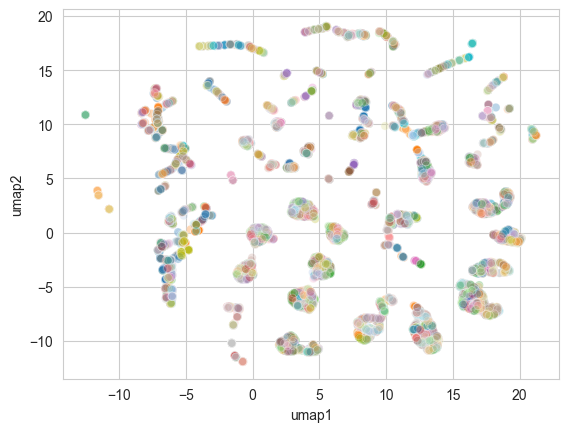

In [40]:
sns.scatterplot(
x="umap1", y="umap2",
hue="cluster",
palette=sns.color_palette("tab20", df_umap["cluster"].nunique()),
data=df_umap,
legend=None,
alpha=0.3,
)


In [67]:
from sklearn.cluster import AgglomerativeClustering, DBSCAN

cls = DBSCAN(1e-6, min_samples=1, metric="cosine")
res = df_model.copy()
res["cluster"] = cls.fit_predict(X_scaled)
res.sort_values("fiyat", inplace=True)
res = res.query("cluster != -1")
res["cluster"] = pd.factorize(res["cluster"])[0]
res.sort_values("cluster")

,make,yas,yakit,vites,km,umap1,umap2,fiyat,cluster
21724,dacia logan 1.5-dci ambiance,11,dizel,manuel,467000,1.227891,4.946915,75500,0
20713,volkswagen passat 1.4-tsi-bluemotion comfortline,5,benzin,manuel,29000,21.620731,0.478513,395000,0
7082,volkswagen passat 1.6-tdi-bluemotion trendline,7,dizel,yari-otomatik,171000,-5.275484,15.155433,278500,0
23561,audi a4 a4-sedan 2.0-tdi-quattro,10,dizel,otomatik,300000,3.364128,7.914725,330000,0
2156,chery kimo 1.3 forza,12,benzin-lpg,otomatik,110000,-7.417976,13.271712,75500,1
...,...,...,...,...,...,...,...,...,...
10705,mercedes-benz cls 400-d,5,dizel,otomatik,62000,12.903460,-5.940846,1930000,20954
11764,mercedes-benz cls 400-d,5,dizel,otomatik,55000,11.739585,-3.651322,1940000,20955
24931,porsche 718 cayman,6,benzin,otomatik,13200,3.505730,6.618975,1940000,20956
16215,mercedes-benz s-serisi s-350 bluetec-4matic-7g...,9,dizel,otomatik,84000,12.956591,-6.264488,1950000,20957


In [68]:
from sklearn.metrics import pairwise_distances

In [69]:
res.tail()
# res.query("cluster == 0")
# res.query("make == 'volkswagen polo 1.2-tsi lounge'")

,make,yas,yakit,vites,km,umap1,umap2,fiyat,cluster
16215,mercedes-benz s-serisi s-350 bluetec-4matic-7g...,9,dizel,otomatik,84000,12.956591,-6.264488,1950000,20957
13990,bmw 5-serisi 520d-xdrive special-edition-luxur...,3,dizel,otomatik,3000,14.471280,19.253967,1970000,3803
3959,porsche taycan 4s-performance-plus,3,elektrik,otomatik,2850,12.644169,-5.817013,1970000,20958
7997,porsche taycan 4s-performance-plus,3,elektrik,otomatik,1000,12.791387,-6.105450,1990000,298
10848,mercedes-benz cls 400-d,5,dizel,otomatik,21000,9.808445,-1.231925,1990000,16209


In [70]:
res.groupby("cluster").agg({"fiyat": ["mean", "median", "std"]}).droplevel(level=0, axis=1)
from scipy import stats
res["zscore"] = res.groupby("cluster")["fiyat"].transform(stats.zscore)

In [73]:
res.query("cluster == 1025")

,make,yas,yakit,vites,km,umap1,umap2,fiyat,cluster,zscore
20917,fiat punto evo-1.3-multijet dynamic,12,dizel,manuel,209000,-0.979793,7.416673,110500,1025,-0.783520
19228,opel corsa 1.3-cdti essentia,10,dizel,manuel,199852,21.943186,3.790407,116000,1025,-0.761582
29,renault clio 1.5-dci joy,9,dizel,manuel,156000,-7.998253,3.033432,132000,1025,-0.697760
6982,renault fluence 1.5-dci extreme,11,dizel,yari-otomatik,212500,-9.062547,7.311145,136500,1025,-0.679810
19571,renault clio 1.5-dci touch,10,dizel,manuel,180000,-3.663340,3.769439,147000,1025,-0.637927
19994,fiat egea 1.3-multijet easy,7,dizel,manuel,166000,-6.876925,5.811954,152500,1025,-0.615989
3739,kia ceed 1.6-crdi concept-plus-sw,10,dizel,otomatik,192000,8.136030,11.402702,172000,1025,-0.538206
2052,ford fiesta 1.5-tdci titanium-x,8,dizel,manuel,53400,-1.937796,5.928146,175000,1025,-0.526240
22027,toyota corolla 1.4-d-4d touch,7,dizel,yari-otomatik,172500,-7.462463,11.133441,176900,1025,-0.518661
11745,renault megane 1.5-dci touch,6,dizel,otomatik,149000,12.728553,-5.922754,187500,1025,-0.476379


In [75]:
z = res.groupby("cluster")["make"].count().sort_values()
z

cluster
10479     1
13918     1
13917     1
13916     1
13915     1
         ..
1025     27
229      31
426      48
967      60
8        88
Name: make, Length: 20959, dtype: int64

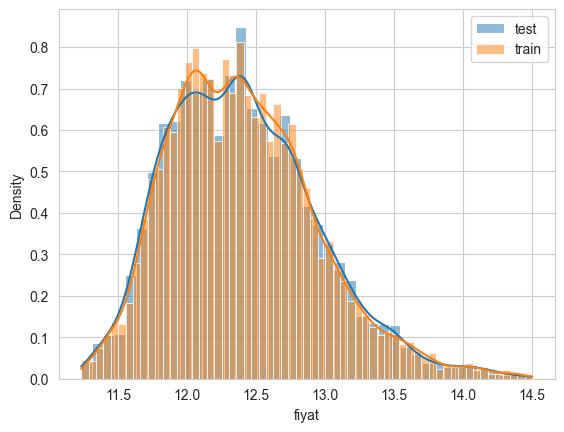

In [438]:
sns.histplot(x=y_test, kde=True, label="test", stat="density")
sns.histplot(x=y_train, kde=True,  label="train", stat="density")
plt.legend()

/Users/berkayg/miniforge3/envs/torch-gpu/lib/python3.8/site-packages/pandas/core/arraylike.py:402: RuntimeWarning:

divide by zero encountered in log

/Users/berkayg/miniforge3/envs/torch-gpu/lib/python3.8/site-packages/pandas/core/arraylike.py:402: RuntimeWarning:

divide by zero encountered in log



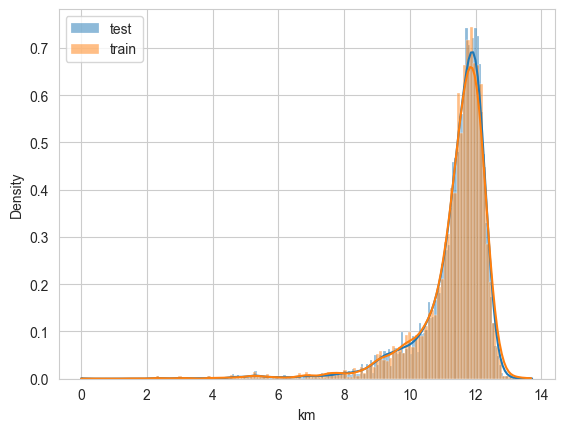

In [439]:
sns.histplot(x=np.log(X_train["km"]), kde=True, label="test", stat="density")
sns.histplot(x=np.log(X_test["km"]), kde=True,  label="train", stat="density")
plt.legend()